In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.svm import SVC


In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('HR_Dataset.csv')

In [4]:
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
11107,0.87,0.60,5,165,2,1,0,0,marketing,high
9821,0.61,0.99,5,98,2,0,0,0,support,medium
7918,0.90,0.81,6,273,5,0,0,0,technical,medium
4143,1.00,1.00,5,142,4,0,0,0,sales,low
12781,0.91,0.96,4,232,5,0,1,0,sales,low


In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
data.rename(columns={'Departments ':'departments'},inplace=True)

In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [8]:
data.shape #row,col

(14999, 10)

In [9]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.22631-SP0
Python 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
NumPy 1.23.3
SciPy 1.13.1
Scikit-Learn 1.2.2


In [10]:
pip install scikit-learn==0.23.1


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [682 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
    Using cached wheel-0.43


  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
data.duplicated().any()

True

In [14]:
data = data.drop_duplicates()

<Axes: ylabel='left'>

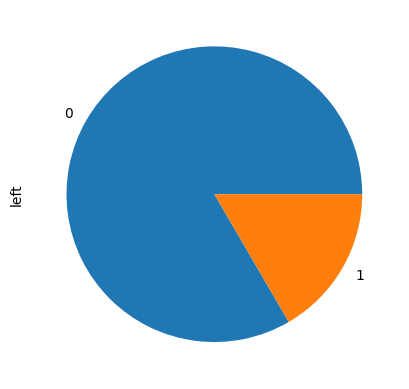

In [15]:
data['left'].value_counts().plot(kind='pie')

In [16]:
X = data.drop(columns=['left'])

In [17]:
y = data['left']

In [18]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

# standardScaler in all numerical feature so that no 2 numerical feature should be given priority based on there scale
# nomial feature--> non ordering features
# ordinal--> order matters for this feature
# all the other colums will be preserved as it is
# column transformer is a package that combine different preprocessing step on different column into one

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [20]:
def model_scorer(model_name,model):
    
    output=[]
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(accuracy_score(y_test,y_pred))
    
    output.append(precision_score(y_test,y_pred))
    
    output.append(recall_score(y_test,y_pred))
    
    return output

In [21]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier(),
    'SVM' : SVC()
    
}

In [22]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [23]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9716548561900792, 0.9044117647058824, 0.9271356783919598],
 ['random_forest', 0.9854105877448937, 0.9865951742627346, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005],
 ['SVM', 0.9708211754897874, 0.91, 0.914572864321608]]

In [24]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [25]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
    
])

In [26]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [27]:
sample = pd.DataFrame({
   'satisfaction_level':0.5,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':100,
    'time_spend_company':2,
    'Work_accident':0,
    'promotion_last_5years':1,
    'departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [28]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the company")
else:
    print("An Employee may stay with the company")

An Employee may stay with the company


In [29]:
import pickle

In [30]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [31]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [32]:
result = pipeline_saved.predict(sample)

if result == 1:
    print("An Employee may leave the company")
else:
    print("An Employee may stay with the company")

An Employee may stay with the company
